In [1]:
import math
import random
import os

import numpy as np

from comet_ml import API
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

COMET_API_KEY="bSyRm6vJpAwfehizXic7Fo0bY"
COMET_REST_API_KEY="S3g50KZWG8zEgk1PLzKUn0eEq"


In [17]:
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
results = {
    'fame': {},
    'baseline': {}
}
reward_keys = ['episode_reward.n0', 'episode_reward.n1', 'episode_reward.n2']

for tag in results.keys():
    for ep_reward_key in reward_keys:
        results[tag][ep_reward_key] = []

for exp in client.get("jh-jl-rlfl/ddpg-mountaincarcontinuous"):
    params = client.get_experiment_parameters(exp)
    metrics = client.get_experiment_metrics_raw(exp)
    tag = client.get_experiment_tags(exp)[0]
    
    rewards = {}
    for ep_reward_key in reward_keys:
        rewards[ep_reward_key] = []
    
    for metric in metrics:
        if metric['metricName'] in reward_keys:
            rewards[metric['metricName']].append(float(metric['metricValue']))
    
    for ep_reward_key in reward_keys:
        # now that we have all the episode rewards, copy them to the root results:
        results[tag][ep_reward_key].append(rewards[ep_reward_key])

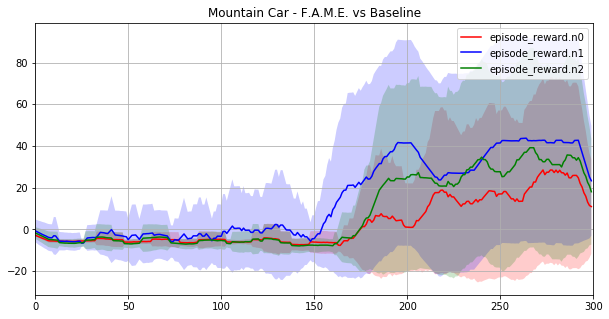

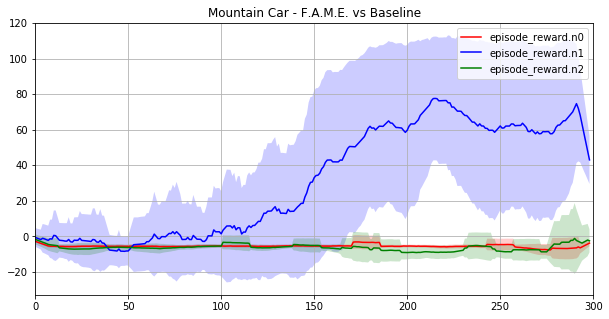

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ['red', 'blue', 'green']
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


for idx, (key, result_set) in enumerate(results['fame'].items()):
    xs = np.arange(len(result_set[0]))
    ys_mean = np.mean(result_set, axis=0)
    std = np.std(result_set, axis=0)
    upper = [ys_mean[idx] + std for idx,std in enumerate(std)]
    lower = [ys_mean[idx] - std for idx,std in enumerate(std)]
    plt.plot(xs, smooth(ys_mean,15), label=key, color=colors[idx])
    plt.fill_between(xs, smooth(upper,15), smooth(lower,15), where=upper>=lower,  facecolor=colors[idx],  interpolate=True, alpha=0.2)

    
    
ax.set_title("Mountain Car - F.A.M.E. vs Baseline")
ax.grid()
ax.legend()
ax.set_xlim(0,300)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))

for idx, (key, result_set) in enumerate(results['baseline'].items()):
    result_set = [s[:299] for s in result_set]
    xs = np.arange(len(result_set[0]))
    xs = xs
    ys_mean = np.mean(result_set, axis=0)
    std = np.std(result_set, axis=0)
    upper = [ys_mean[idx] + std for idx,std in enumerate(std)]
    lower = [ys_mean[idx] - std for idx,std in enumerate(std)]
    plt.plot(xs, smooth(ys_mean,15), label=key, color=colors[idx])
    plt.fill_between(xs, smooth(upper,15), smooth(lower,15), where=upper>=lower,  facecolor=colors[idx],  interpolate=True, alpha=0.2)

    
    
ax.set_title("Mountain Car - F.A.M.E. vs Baseline")
#ax.set_xlabel("Gravity (Inverse Pendulum)", fontsize=13)
#ax.set_ylabel("Trailing 5-Episode Average Reward (5K frames)", fontsize=13)
ax.grid()
ax.legend()
ax.set_xlim(0,300)
plt.show()



In [59]:
a = [2,3,4,5,6][:2]
a


[2, 3]